In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.replace('?', np.nan, inplace=True)

### Imputing the missing values by deleting

In [8]:
#delete the rows where the values are missing
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
# Data cleaning: Standardize education categories
hs_grad = ['HS-grad', '11th', '10th', '9th', '12th']
elementary = ['1st-4th', '5th-6th', '7th-8th']
df['education'].replace(hs_grad, 'HS-grad', inplace=True)
df['education'].replace(elementary, 'elementary_school', inplace=True)

df['education'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_18128\2444899451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(hs_grad, 'HS-grad', inplace=True)


education
HS-grad              12540
Some-college          6678
Bachelors             5044
Masters               1627
Assoc-voc             1307
Assoc-acdm            1008
elementary_school      996
Prof-school            542
Doctorate              375
Preschool               45
Name: count, dtype: int64

In [11]:
# Data cleaning: Standardize marital status categories
married = ['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse']
separated = ['Separated', 'Divorced']
df['marital.status'].replace(married, 'Married', inplace=True)
df['marital.status'].replace(separated, 'Separated', inplace=True)

df['marital.status'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_18128\3798892871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital.status'].replace(married, 'Married', inplace=True)


marital.status
Married          14456
Never-married     9726
Separated         5153
Widowed            827
Name: count, dtype: int64

In [12]:
# Data cleaning: Standardize workclass categories
self_employed = ['Self-emp-not-inc', 'Self-emp-inc']
govt_employees = ['Local-gov', 'State-gov', 'Federal-gov']
df['workclass'].replace(self_employed, 'Self_employed', inplace=True)
df['workclass'].replace(govt_employees, 'Govt_employees', inplace=True)

df['workclass'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_18128\1171585778.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(self_employed, 'Self_employed', inplace=True)


workclass
Private           22286
Govt_employees     4289
Self_employed      3573
Without-pay          14
Name: count, dtype: int64

Text(0.5, 1.0, 'Income Distribution')

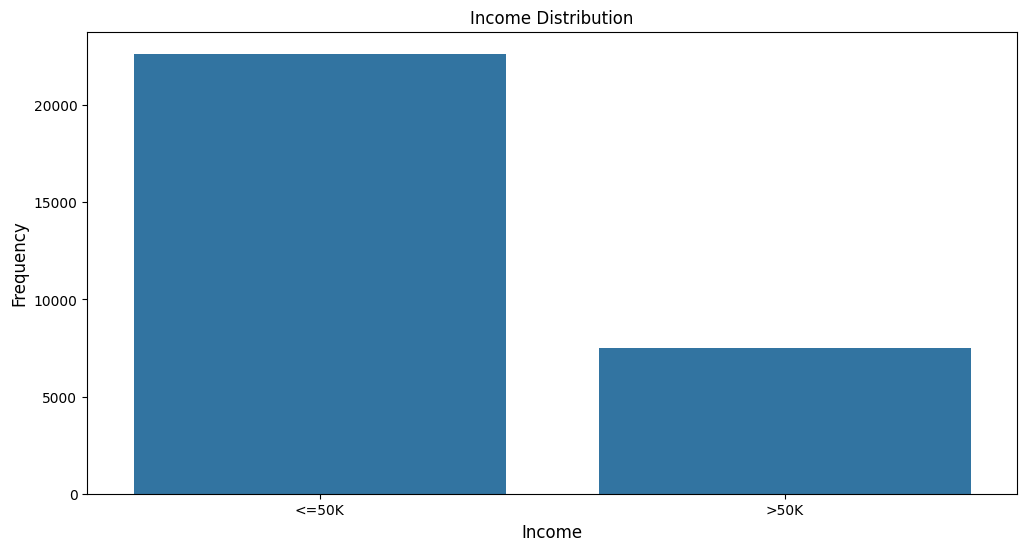

In [13]:
# Visualize income distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='income', data=df)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Income Distribution")

Text(0.5, 1.02, 'Numeric Features Histograms')

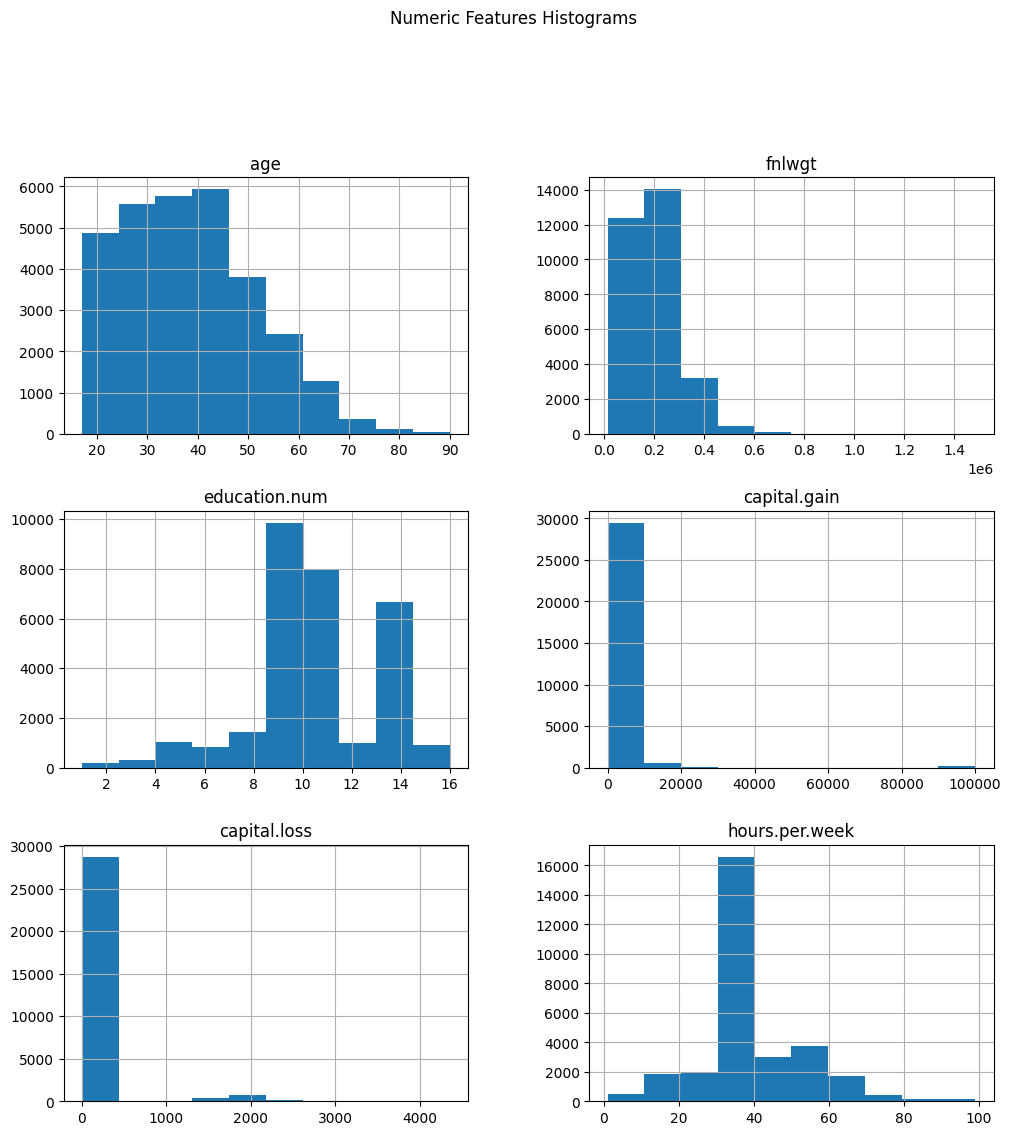

In [14]:
# Explore numeric features using histograms
df.select_dtypes(include=np.number).hist(figsize=(12, 12))
plt.suptitle('Numeric Features Histograms', y=1.02)

- `age`: In our dataset People from age group of 18 to 50 can be observed.
- `hours per week`: Generally people can be seen working for 30 hours to 40 hours per week.
- `education`: people above 8th grade are more in our dataset.
- Our dataset is highly skewed and we should consider scaling it for better performance of our models.

Text(0.5, 1.02, 'High Capital Loss and High Income Group Characteristics')

<Figure size 1200x1200 with 0 Axes>

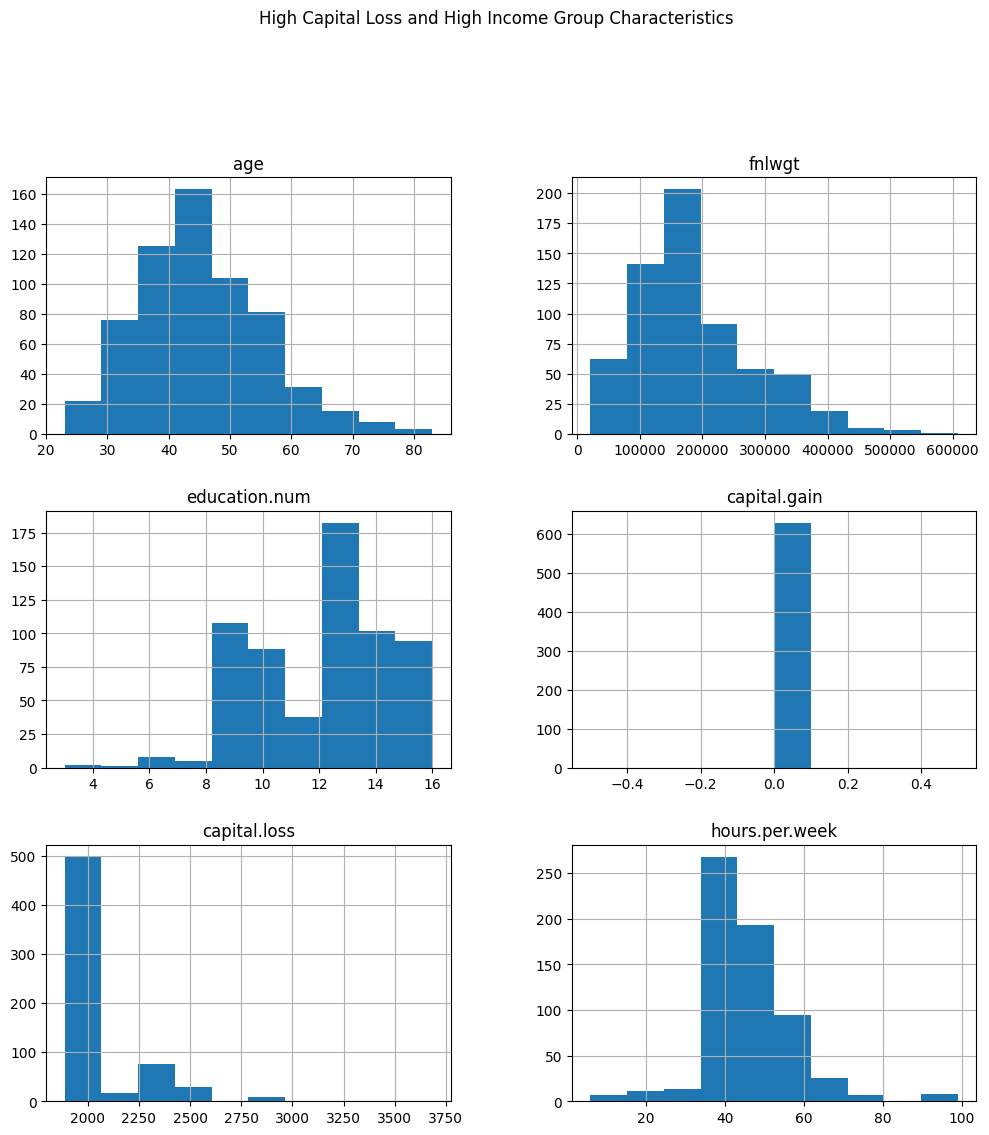

In [15]:
plt.figure(figsize=(12, 12))
df[(df['capital.loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize=(12, 12))
plt.suptitle('High Capital Loss and High Income Group Characteristics', y=1.02)

- Education and hours per week are significantaly high.
- There are some other factors affecting their loss other than the above.

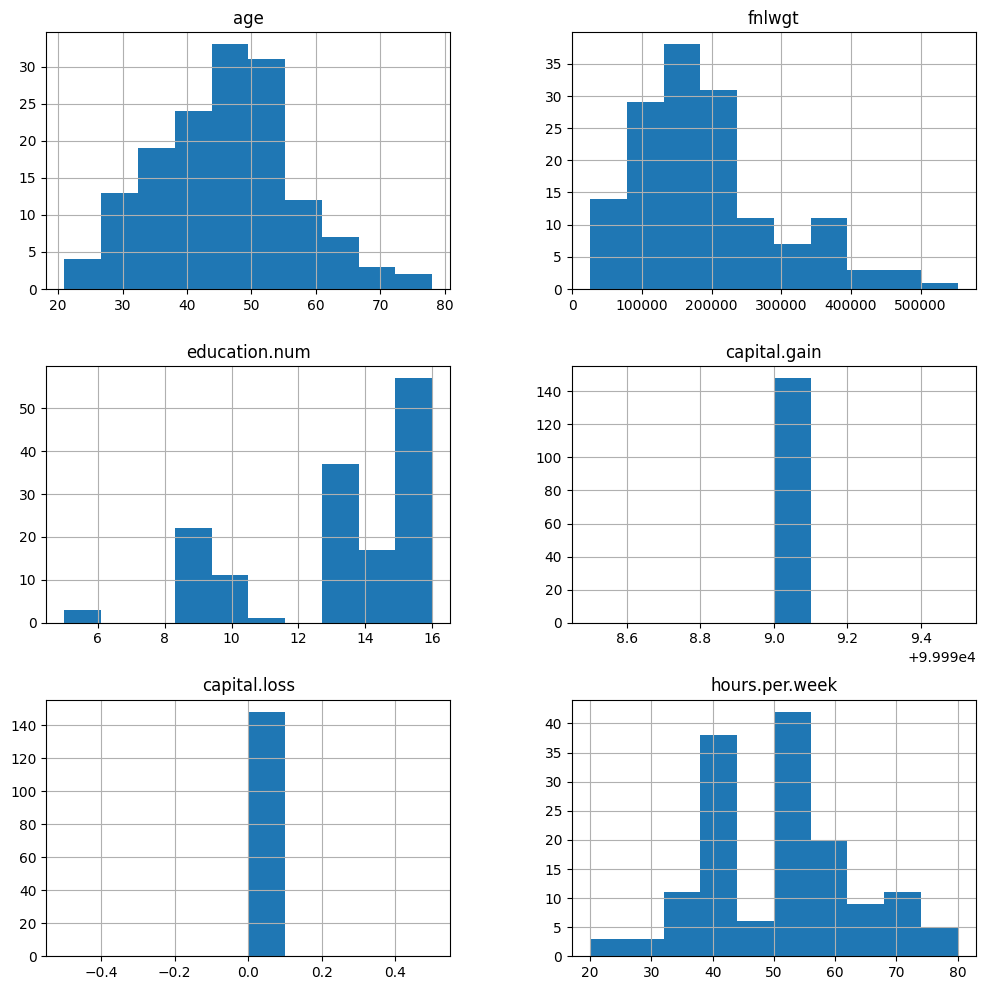

In [16]:
df.loc[df['capital.gain'] == 99999,:].hist(figsize = (12,12));

- Age group and hours per week are fairly distributed for capital gain of 99999.

In [17]:
# Separate features (X) and target variable (y)
selected_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Separate features (X) and target variable (y)
X = df[selected_columns]
y = df['income']

# Chi-square test for categorical variables
chi2_results = []
for column in X.select_dtypes(include='object'):
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': column, 'Chi2': chi2, 'P-value': p})

print("Chi-square Test Results:")
print(pd.DataFrame(chi2_results))

Chi-square Test Results:
          Feature         Chi2        P-value
0       workclass   460.915366   1.406662e-99
1       education  3953.864983   0.000000e+00
2  marital.status  5790.362233   0.000000e+00
3      occupation  3687.620651   0.000000e+00
4    relationship  6233.840454   0.000000e+00
5            race   304.241374   1.317829e-64
6             sex  1415.286404  1.001553e-309
7  native.country   317.736675   6.221222e-45


In [18]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

cols = ['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country','income']
for col in cols:
    df[col] = label_encoder(df[col])

df.head()

education ['Assoc-acdm' 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters'
 'Preschool' 'Prof-school' 'Some-college' 'elementary_school']
workclass ['Govt_employees' 'Private' 'Self_employed' 'Without-pay']
marital.status ['Married' 'Never-married' 'Separated' 'Widowed']
occupation ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
relationship ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
sex ['Female' 'Male']
native.country ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicara

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,1,132870,4,9,3,3,1,4,0,0,4356,18,38,0
3,54,1,140359,9,4,2,6,4,4,0,0,3900,40,38,0
4,41,1,264663,8,10,2,9,3,4,0,0,3900,40,38,0
5,34,1,216864,4,9,2,7,4,4,0,0,3770,45,38,0
6,38,1,150601,4,6,2,0,4,4,1,0,3770,40,38,0


<Axes: >

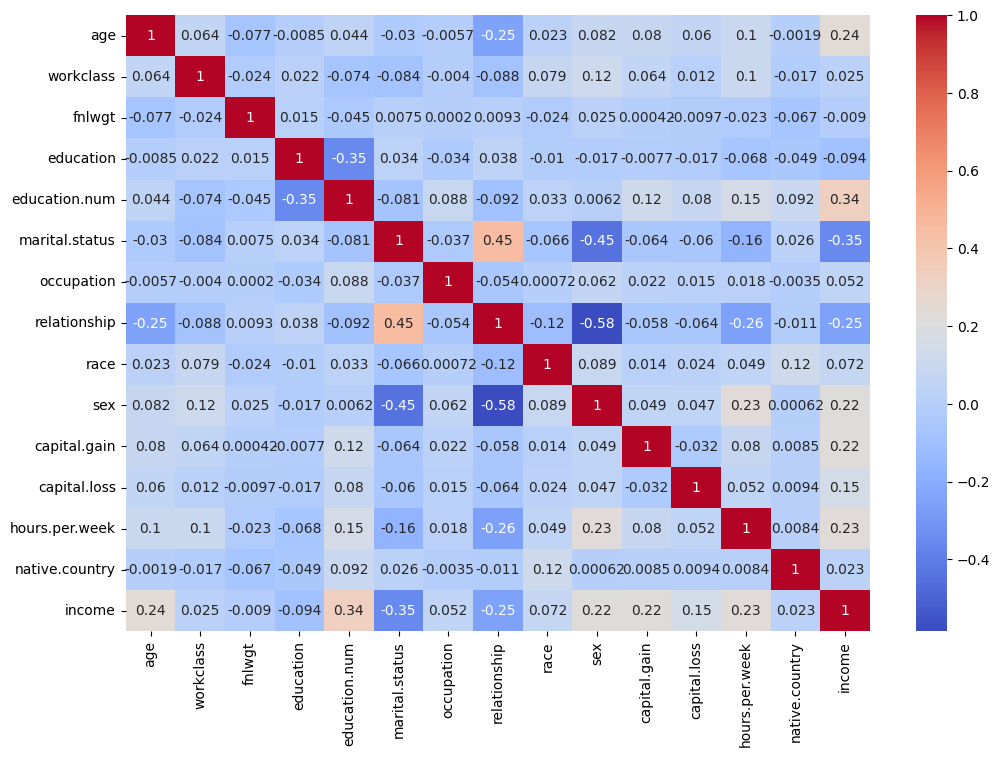

In [19]:
# df['income']

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

Logistic Regression

In [20]:
X = df.drop(['income', 'fnlwgt', 'native.country','workclass','occupation', 'race','relationship','sex'], axis=1)
#X = df.drop(['income'], axis=1)
y = df['income']

In [21]:
# split the data into train and validate sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [22]:
# Standrize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
#train the logistic regression model
model = LogisticRegression(C=1e9)
model.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [24]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-1.57947395]
Coefficients: [[ 0.55354072  0.08996267  0.89391813 -1.14877418  2.45347262  0.26154987
   0.37896107]]


In [25]:
# X_val = X_val[:, :7]
# Predict on the validation set
y_pred = model.predict(X_val)


In [26]:
# Build the logistic regression model with statsmodels
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.359944
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                18097
Model:                          Logit   Df Residuals:                    18089
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 May 2024   Pseudo R-squ.:                  0.3591
Time:                        15:30:23   Log-Likelihood:                -6513.9
converged:                       True   LL-Null:                       -10163.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5794      0.030    -53.349      0.000      -1.637      -1.521
x1             0.5537      0.

In [27]:
#We predict probability of default using the logisitic regression model trained above, and evalute how good the classifications are.
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8341621908361514


In [28]:
#For the overall accuracy of classification, we use the standard confusion matrix and measures such as recall, precision and accuracy.
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10555   746]
 [ 1755  2025]]


Text(0.5, 1.0, 'Confusion Matrix')

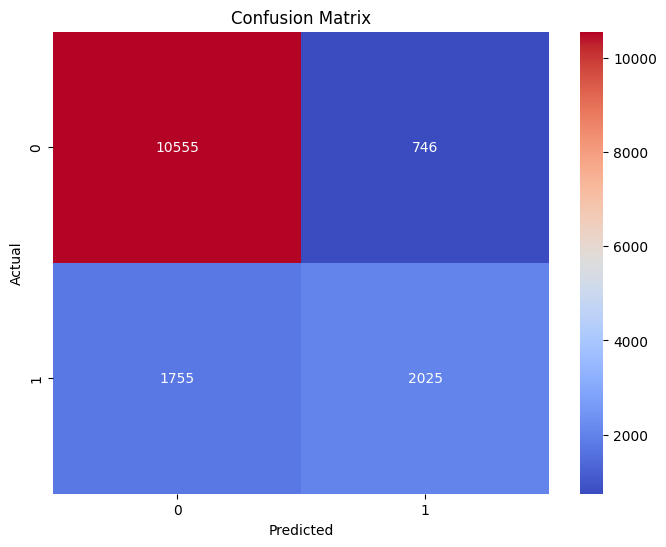

In [29]:
#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [30]:
#classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11301
           1       0.73      0.54      0.62      3780

    accuracy                           0.83     15081
   macro avg       0.79      0.73      0.76     15081
weighted avg       0.83      0.83      0.82     15081

